In [5]:
! unzip /content/drive/MyDrive/PS2\ Train.zip


Streaming output truncated to the last 5000 lines.
  inflating: PS2 Train/video53/sample058_1/img_00.jpg  
  inflating: PS2 Train/video53/sample058_1/img_01.jpg  
  inflating: PS2 Train/video53/sample058_1/img_02.jpg  
  inflating: PS2 Train/video53/sample058_1/img_03.jpg  
  inflating: PS2 Train/video53/sample058_1/img_04.jpg  
  inflating: PS2 Train/video53/sample058_1/img_05.jpg  
  inflating: PS2 Train/video53/sample058_1/img_06.jpg  
  inflating: PS2 Train/video53/sample058_1/img_07.jpg  
  inflating: PS2 Train/video53/sample058_1/img_08.jpg  
  inflating: PS2 Train/video53/sample058_1/img_09.jpg  
   creating: PS2 Train/video53/sample059_1/
  inflating: PS2 Train/video53/sample059_1/img_00.jpg  
  inflating: PS2 Train/video53/sample059_1/img_01.jpg  
  inflating: PS2 Train/video53/sample059_1/img_02.jpg  
  inflating: PS2 Train/video53/sample059_1/img_03.jpg  
  inflating: PS2 Train/video53/sample059_1/img_04.jpg  
  inflating: PS2 Train/video53/sample059_1/img_05.jpg  
  inflati

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
import os
from PIL import Image


In [7]:
# Define data transformations for data augmentation and normalization
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [8]:
import os
import shutil

# Source base directory
base_dir = "/content/PS2 Train"

# Destination directories
destination_dir_0 = "/content/class0"
destination_dir_1 = "/content/class1"

# Ensure destination directories exist
os.makedirs(destination_dir_0, exist_ok=True)
os.makedirs(destination_dir_1, exist_ok=True)

# Initialize file index
file_index = 0

# Iterate over video directories
for videodir in os.listdir(base_dir):
    video_path = os.path.join(base_dir, videodir)
    if os.path.isdir(video_path):
        # Iterate over subfolders in each video directory
        for foldername in os.listdir(video_path):
            folder_path = os.path.join(video_path, foldername)
            if os.path.isdir(folder_path):
                # Check if folder name ends with '0' or '1'
                if foldername.endswith('0'):
                    destination_dir = destination_dir_0
                elif foldername.endswith('1'):
                    destination_dir = destination_dir_1
                else:
                    continue  # Skip folders that don't end with '0' or '1'

                # Iterate over files in the folder
                for filename in os.listdir(folder_path):
                    file_path = os.path.join(folder_path, filename)
                    if os.path.isfile(file_path):
                        # Construct destination path with incremented file index
                        destination_path = os.path.join(destination_dir, f"{file_index}.jpeg")

                        # Copy file from source to destination
                        shutil.copyfile(file_path, destination_path)

                        # Increment file index
                        file_index += 1

In [9]:
!mkdir data

In [23]:
import os
import random
import shutil

# Define paths
source_dir = "/content/data"
train_dir = "/content/data_/train"
val_dir = "/content/data_/val"
test_dir = "/content/data_/test"

# Create train, val, test directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Define the ratio for using only 10% of the data
data_ratio = 0.1

# Iterate through each class folder
for class_folder in os.listdir(source_dir):
    class_path = os.path.join(source_dir, class_folder)
    if os.path.isdir(class_path):
        # List all images in the class folder
        images = os.listdir(class_path)
        # Shuffle the images
        random.shuffle(images)
        # Calculate the number of images to use based on the data_ratio
        num_images_to_use = int(len(images) * data_ratio)

        # Select only 10% of the images randomly
        selected_images = random.sample(images, num_images_to_use)

        # Split the selected images into train, val, and test sets
        train_split = int(0.7 * num_images_to_use)
        val_split = int(0.2 * num_images_to_use)

        train_images = selected_images[:train_split]
        val_images = selected_images[train_split:train_split + val_split]
        test_images = selected_images[train_split + val_split:]

        # Move selected images to train directory
        for image in train_images:
            src = os.path.join(class_path, image)
            dst = os.path.join(train_dir, class_folder, image)
            os.makedirs(os.path.dirname(dst), exist_ok=True)
            shutil.copy(src, dst)

        # Move selected images to val directory
        for image in val_images:
            src = os.path.join(class_path, image)
            dst = os.path.join(val_dir, class_folder, image)
            os.makedirs(os.path.dirname(dst), exist_ok=True)
            shutil.copy(src, dst)

        # Move selected images to test directory
        for image in test_images:
            src = os.path.join(class_path, image)
            dst = os.path.join(test_dir, class_folder, image)
            os.makedirs(os.path.dirname(dst), exist_ok=True)
            shutil.copy(src, dst)

print("Data splitting completed successfully.")


Data splitting completed successfully.


In [22]:
!rm -rf /content/data_/

In [24]:
# Define the data directory
data_dir = '/content/data_'

# Create data loaders
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}
#image_datasets

In [25]:
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=4) for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
print(dataset_sizes)

class_names = image_datasets['train'].classes
class_names


{'train': 3040, 'val': 868}


['class0', 'class1']

In [26]:
# Load the pre-trained ResNet-18 model
model = models.resnet18(pretrained=True)

# Freeze all layers except the final classification layer
for name, param in model.named_parameters():
    if "fc" in name:  # Unfreeze the final classification layer
        param.requires_grad = True
    else:
        param.requires_grad = False

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)  # Use all parameters



In [27]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [41]:
import torch
train_losses = []
val_losses = []
train_accs = []
val_accs = []
# Define the number of epochs
num_epochs = 10

# Iterate over epochs
for epoch in range(num_epochs):
    print(f'Epoch {epoch + 1}/{num_epochs}')
    print('-' * 10)

    # Iterate over training and validation phases
    for phase in ['train', 'val']:
        if phase == 'train':
            model.train()  # Set model to training mode
        else:
            model.eval()   # Set model to evaluation mode

        running_loss = 0.0
        running_corrects = 0

        # Iterate over data.
        for i, (inputs, labels) in enumerate(dataloaders[phase], 1):
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Zero the parameter gradients only in the training phase
            optimizer.zero_grad()

            # Forward pass, track history if only in training phase
            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                # Backward + optimize only if in training phase
                if phase == 'train':
                    loss.backward()
                    optimizer.step()

            # Statistics
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

            # Print mini-batch statistics if in training phase
            if phase == 'train':
                print(f'{phase} Epoch [{epoch + 1}/{num_epochs}], '
                      f'Mini-batch [{i}/{len(dataloaders[phase])}], '
                      f'Loss: {loss.item():.4f}, '
                      f'Acc: {(torch.sum(preds == labels.data).double() / labels.size(0)):.4f}')

        # Calculate epoch statistics
        epoch_loss = running_loss / dataset_sizes[phase]
        epoch_acc = running_corrects.double() / dataset_sizes[phase]

        # Print epoch statistics
        print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
        if phase == 'train':
            train_losses.append(epoch_loss)
            train_accs.append(epoch_acc)
        else:
            val_losses.append(epoch_loss)
            val_accs.append(epoch_acc)

print("Training complete!")


Epoch 1/10
----------


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


train Epoch [1/10], Mini-batch [1/760], Loss: 0.3704, Acc: 0.7500
train Epoch [1/10], Mini-batch [2/760], Loss: 2.0414, Acc: 0.5000
train Epoch [1/10], Mini-batch [3/760], Loss: 0.0209, Acc: 1.0000
train Epoch [1/10], Mini-batch [4/760], Loss: 0.2501, Acc: 0.7500
train Epoch [1/10], Mini-batch [5/760], Loss: 2.1421, Acc: 0.5000
train Epoch [1/10], Mini-batch [6/760], Loss: 0.0879, Acc: 1.0000
train Epoch [1/10], Mini-batch [7/760], Loss: 0.1216, Acc: 1.0000
train Epoch [1/10], Mini-batch [8/760], Loss: 0.6822, Acc: 0.7500
train Epoch [1/10], Mini-batch [9/760], Loss: 0.5079, Acc: 0.7500
train Epoch [1/10], Mini-batch [10/760], Loss: 0.6734, Acc: 0.7500
train Epoch [1/10], Mini-batch [11/760], Loss: 0.0236, Acc: 1.0000
train Epoch [1/10], Mini-batch [12/760], Loss: 0.5627, Acc: 0.7500
train Epoch [1/10], Mini-batch [13/760], Loss: 0.4747, Acc: 0.7500
train Epoch [1/10], Mini-batch [14/760], Loss: 0.5065, Acc: 0.7500
train Epoch [1/10], Mini-batch [15/760], Loss: 0.2147, Acc: 1.0000
trai

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Streaming output truncated to the last 5000 lines.
train Epoch [4/10], Mini-batch [348/760], Loss: 0.1254, Acc: 1.0000
train Epoch [4/10], Mini-batch [349/760], Loss: 0.0312, Acc: 1.0000
train Epoch [4/10], Mini-batch [350/760], Loss: 0.1745, Acc: 1.0000
train Epoch [4/10], Mini-batch [351/760], Loss: 0.0808, Acc: 1.0000
train Epoch [4/10], Mini-batch [352/760], Loss: 0.0297, Acc: 1.0000
train Epoch [4/10], Mini-batch [353/760], Loss: 0.1286, Acc: 1.0000
train Epoch [4/10], Mini-batch [354/760], Loss: 0.1137, Acc: 1.0000
train Epoch [4/10], Mini-batch [355/760], Loss: 1.3735, Acc: 0.5000
train Epoch [4/10], Mini-batch [356/760], Loss: 0.0270, Acc: 1.0000
train Epoch [4/10], Mini-batch [357/760], Loss: 1.8883, Acc: 0.5000
train Epoch [4/10], Mini-batch [358/760], Loss: 0.0705, Acc: 1.0000
train Epoch [4/10], Mini-batch [359/760], Loss: 1.5167, Acc: 0.7500
train Epoch [4/10], Mini-batch [360/760], Loss: 0.3509, Acc: 0.7500
train Epoch [4/10], Mini-batch [361/760], Loss: 0.2239, Acc: 1.00

In [42]:
torch.save(model.state_dict(), '/content/models/smoke_detection_10.pth')
torch.save(model.state_dict(), '/content/drive/MyDrive/smoke_detection_10.pth')


In [30]:
# Load and preprocess the unseen image

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


In [31]:
class0_test_path = '/content/data_/test/class0'
images0 = os.listdir(class0_test_path)
predicted_0_labels = []
for image in images0:
  image_path = "/content/data_/test/class0/"+image
  input_tensor = preprocess(Image.open(image_path))
  input_batch = input_tensor.unsqueeze(0)
  # Perform inference
  with torch.no_grad():
      output = model(input_batch)

  # Get the predicted class
  _, predicted_class = output.max(1)

  # Map the predicted class to the class name
  class_names = ['class0', 'class1']  # Make sure these class names match your training data
  predicted_class_name = class_names[predicted_class.item()]

  predicted_0_labels.append(predicted_class_name)

In [43]:
class1_test_path = '/content/data_/test/class1'
images1 = os.listdir(class1_test_path)
predicted_1_labels = []
for image in images1:
  image_path = "/content/data_/test/class1/"+image
  input_tensor = preprocess(Image.open(image_path))
  input_batch = input_tensor.unsqueeze(0)
  # Perform inference
  with torch.no_grad():
      output = model(input_batch)

  # Get the predicted class
  _, predicted_class = output.max(1)

  # Map the predicted class to the class name
  class_names = ['class0', 'class1']  # Make sure these class names match your training data
  predicted_class_name = class_names[predicted_class.item()]

  predicted_1_labels.append(predicted_class_name)

In [63]:
wrong_class0_predicted = predicted_0_labels.count("class1")

In [64]:
wrong_class0_predicted

5

In [67]:
len(predicted_0_labels)

353

In [68]:
wrong_class1_predicted = predicted_1_labels.count("class0")

In [69]:
wrong_class1_predicted

25

In [71]:
len(predicted_1_labels)

84

In [44]:
actual_0_labels = ["class0"]*(len(predicted_0_labels))

In [45]:
actual_1_labels = ["class1"]*(len(predicted_1_labels))

In [46]:
actual_labels = actual_0_labels+actual_1_labels

In [47]:
predicted_labels = predicted_0_labels+predicted_1_labels

In [48]:
from sklearn.metrics import classification_report

In [49]:
report = classification_report(actual_labels, predicted_labels)
print(report)

              precision    recall  f1-score   support

      class0       0.93      1.00      0.96       353
      class1       0.98      0.70      0.82        84

    accuracy                           0.94       437
   macro avg       0.96      0.85      0.89       437
weighted avg       0.94      0.94      0.94       437



In [50]:
directory = "classification_reports"

# Create the directory if it does not exist
if not os.path.exists(directory):
    os.makedirs(directory)

In [51]:
# Specify the filename
filename = "classification_report.txt"

# Combine the directory and filename to get the full path
file_path = os.path.join(directory, filename)

# Open the file in write mode
with open(file_path, "w") as f:
    # Write the classification report to the file
    f.write(report)

# Print a message indicating that the file has been saved
print(f"Classification report saved to: {file_path}")

Classification report saved to: classification_reports/classification_report.txt


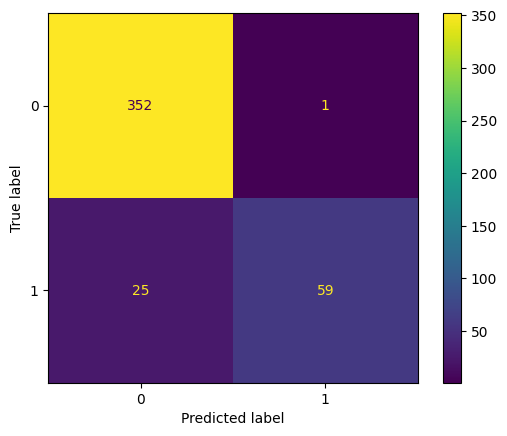

<Figure size 640x480 with 0 Axes>

In [52]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(actual_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
plt.savefig("./classification_reports/Confusion_Matrix.png", dpi=300, bbox_inches="tight")

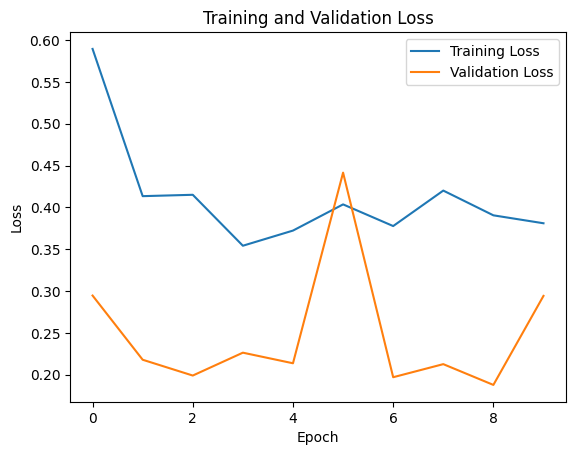

In [96]:
plt.figure()
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
plt.savefig("my_plot.png", dpi=300, bbox_inches="tight")

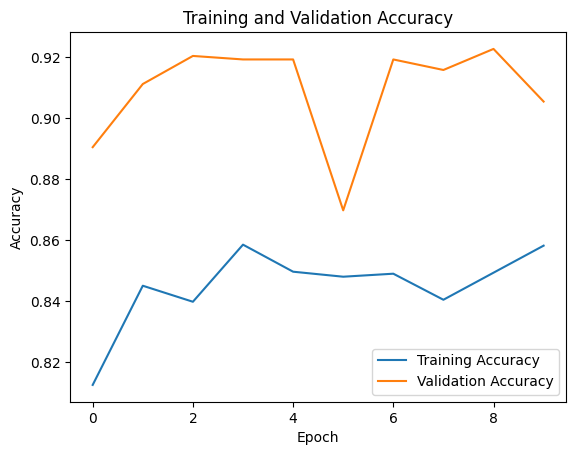

In [97]:
plt.figure()
plt.plot(train_accs, label='Training Accuracy')
plt.plot(val_accs, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
class0_test_path = '/content/data_/test/class0'
images0 = os.listdir(class0_test_path)plt.show()

In [ ]:
import csv

from google.colab import drive
drive.mount('/content/drive')


In [32]:
!unzip /content/drive/MyDrive/PS2_test.zip

Streaming output truncated to the last 5000 lines.
  inflating: PS2 Test/video66/sample062/img_9.jpg  
  inflating: PS2 Test/video79/sample028/img_6.jpg  
  inflating: PS2 Test/video68/sample028/img_02.jpg  
  inflating: PS2 Test/video69/sample072/img_9.jpg  
  inflating: PS2 Test/video66/sample062/img_5.jpg  
  inflating: PS2 Test/video69/sample072/img_3.jpg  
  inflating: PS2 Test/video67/sample006/img_9.jpg  
  inflating: PS2 Test/video66/sample062/img_7.jpg  
  inflating: PS2 Test/video69/sample072/img_0.jpg  
  inflating: PS2 Test/video66/sample062/img_3.jpg  
  inflating: PS2 Test/video67/sample006/img_0.jpg  
  inflating: PS2 Test/video66/sample062/img_2.jpg  
  inflating: PS2 Test/video65/sample002/img_0.jpg  
  inflating: PS2 Test/video69/sample072/img_6.jpg  
  inflating: PS2 Test/video66/sample063/img_04.jpg  
  inflating: PS2 Test/video66/sample062/img_6.jpg  
  inflating: PS2 Test/video79/sample028/img_7.jpg  
  inflating: PS2 Test/video69/sample072/img_5.jpg  
  inflating

In [37]:
PS2_test_path = '/content/PS2_test'
activation_threshold = 5
sample_predictions=[]
sample_names=[]
videos = os.listdir(PS2_test_path)
for video in videos:
  video_path = PS2_test_path+"/"+video
  samples = os.listdir(video_path)
  for sample in samples:
    sample_path = video_path+"/"+sample
    images = os.listdir(sample_path)
    images_prediction=[]
    for image in images:
      image_path = sample_path+"/"+image
      input_tensor = preprocess(Image.open(image_path))
      input_batch = input_tensor.unsqueeze(0)
      # Perform inference
      with torch.no_grad():
          output = model(input_batch)

      # Get the predicted class
      _, predicted_class = output.max(1)

      # Map the predicted class to the class name
      class_names = ['class0', 'class1']  # Make sure these class names match your training data
      predicted_class_name = class_names[predicted_class.item()]

      images_prediction.append(predicted_class_name)
    smoke_count = images_prediction.count("class1")
    if smoke_count>=activation_threshold:
      sample_prediction = 1
    else:
      sample_prediction = 0
    sample_predictions.append(sample_prediction)
    sample_name = video+"_"+sample
    sample_names.append(sample_name)


In [39]:
import csv

In [40]:
with open("output.csv", "w", newline="") as csvfile:
  writer = csv.writer(csvfile)
  writer.writerow(["sample_name", "label"])
  for sample_name, label in zip(sample_names, sample_predictions):
    writer.writerow([sample_name, label])